   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


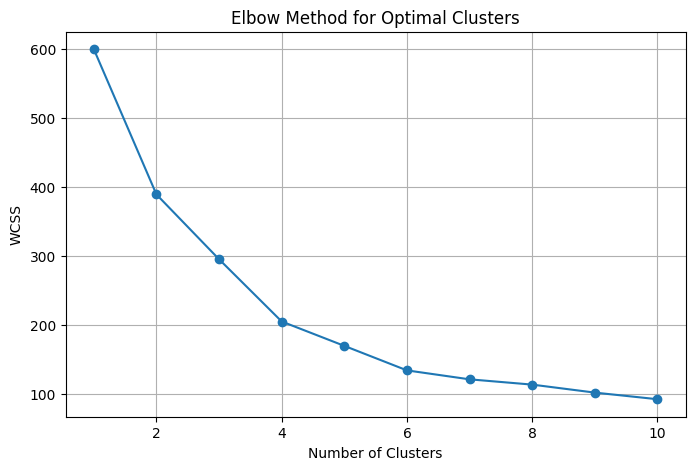

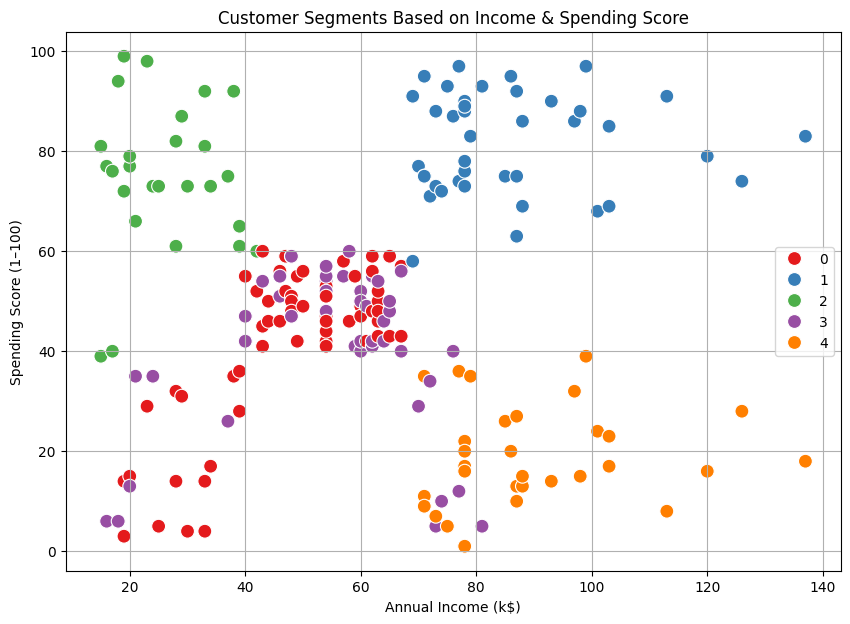

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Load dataset
df = pd.read_csv("Mall_Customers.csv")

# Display basic info
print(df.head())

# Selecting features for clustering
X = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

# Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Determine optimal number of clusters using the Elbow Method
wcss = []  # within-cluster sum of squares
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# Plot the Elbow Curve
plt.figure(figsize=(8,5))
plt.plot(range(1,11), wcss, marker='o')
plt.title("Elbow Method for Optimal Clusters")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.grid(True)
plt.show()

# Let's choose k=5 based on the elbow method
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42)
cluster_labels = kmeans.fit_predict(X_scaled)

# Add cluster labels to original dataframe
df['Cluster'] = cluster_labels

# Visualize clusters in 2D
plt.figure(figsize=(10,7))
sns.scatterplot(data=df, x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster', palette='Set1', s=100)
plt.title("Customer Segments Based on Income & Spending Score")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1–100)")
plt.legend()
plt.grid(True)
plt.show()
